# 1. **Installing**


In [ ]:
%pip install torch torchvision matplotlib
!apt-get install imagemagick

# 2. **Dataset**

In [53]:
!echo "file, label" >> train.csv
!echo "red.jpg, 1" >> train.csv
!echo "green.jpg, 2" >> train.csv
!echo "blue.jpg, 3" >> train.csv

!echo "file, label" >> test.csv
!echo "yellow.jpg, 4" >> test.csv
!echo "cyan.jpg, 5" >> test.csv
!echo "magenta.jpg, 6" >> test.csv

!mkdir -p data/train
!convert -size 32x32 xc:red data/train/red.jpg
!convert -size 32x32 xc:green data/train/green.jpg
!convert -size 32x32 xc:blue data/train/blue.jpg

!mkdir -p data/test
!convert -size 32x32 xc:yellow data/test/yellow.jpg
!convert -size 32x32 xc:cyan data/test/cyan.jpg
!convert -size 32x32 xc:magenta data/test/magenta.jpg

# 3. **Custom Datasets**

To implement your own dataset instead of relying on one of the built-in datasets you have to create a custom class that inherits from `Dataset` in implements `__init__`, `__len__`, and `__getitem__`.

The `__getitem__` function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image's location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

All TorchVision datasets have two parameters - `transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic.

In [19]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# 4. **Dataloaders**

In [54]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

training_data = CustomImageDataset(
    annotations_file="train.csv",
    img_dir='data/train',
)

test_data = CustomImageDataset(
    annotations_file="test.csv",
    img_dir='data/test',
)

# Reshuffle the data at every epoch to reduce model overfitting,
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# 5. **Using the dataloader**

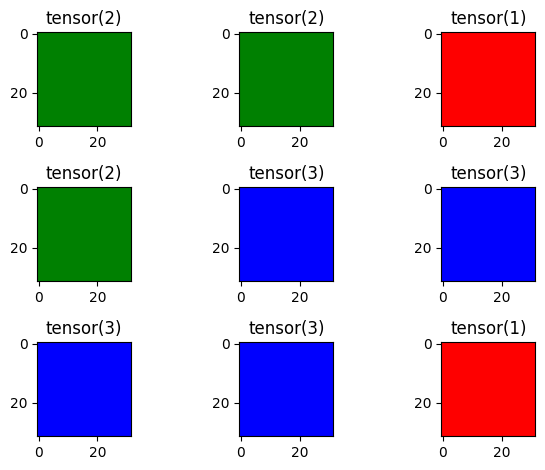

In [76]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(3, 3)

for i in range(9):
  train_features, train_labels = next(iter(train_dataloader))

  img = train_features[0].squeeze().permute(1, 2, 0)
  label = train_labels[0]

  r, c = int(i / 3), i%3
  axis[r, c].imshow(img)
  axis[r, c].set_title(label)

plt.tight_layout()
plt.show()